<a href="https://colab.research.google.com/github/Shayan-1947/EDA/blob/main/EDA_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fifa=pd.read_csv(r"/content/fifa_eda.csv")

In [ ]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [ ]:
fifa.shape

(18207, 18)

In [ ]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [ ]:
fifa.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


In [ ]:
fifa.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [ ]:
fifa=fifa.dropna(subset=["Club","Value","International Reputation","Skill Moves","Contract Valid Until"])

In [ ]:
fifa.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [ ]:
fifa.shape

(17907, 18)

In [ ]:
num=fifa.select_dtypes(exclude=object)

In [ ]:
def find_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (fifa < lower_bound) | (fifa > upper_bound)

    outliers = fifa[outliers_mask].dropna()

    return outliers
outliers = find_outliers(fifa)


<ipython-input-12-88ff524d05f1>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-12-88ff524d05f1>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-12-88ff524d05f1>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_mask = (fifa < lower_bound) | (fifa > upper_bound)


In [ ]:
print('number of outliers: '+ str(len(outliers)))


number of outliers: 0


In [ ]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [ ]:
preferred_foot=fifa.groupby(["Preferred Foot"])["ID"].count()
preferred_foot

Preferred Foot
Left      4159
Right    13748
Name: ID, dtype: int64

In [ ]:
position_ID=fifa.groupby(["Position"])["ID"].count()
position_ID

Position
CAM     946
CB     1751
CDM     936
CF       74
CM     1377
GK     1989
LAM      21
LB     1304
LCB     635
LCM     389
LDM     239
LF       15
LM     1086
LS      206
LW      374
LWB      78
RAM      21
RB     1268
RCB     652
RCM     387
RDM     246
RF       16
RM     1114
RS      201
RW      365
RWB      87
ST     2130
Name: ID, dtype: int64

In [ ]:
Reputation=fifa.groupby(["International Reputation"])["ID"].count()
Reputation

International Reputation  Club                 
1.0                        SSV Jahn Regensburg     29
                          1. FC Heidenheim 1846    28
                          1. FC Kaiserslautern     26
                          1. FC Köln               20
                          1. FC Magdeburg          25
                                                   ..
5.0                       FC Barcelona              2
                          FC Bayern München         1
                          Juventus                  1
                          LA Galaxy                 1
                          Paris Saint-Germain       1
Name: ID, Length: 1125, dtype: int64

In [ ]:
fifa["Height"].mean()

5.946710783492488

In [ ]:
fifa["Weight"].mean()

165.96431563075893

In [ ]:
#Data Visualisation

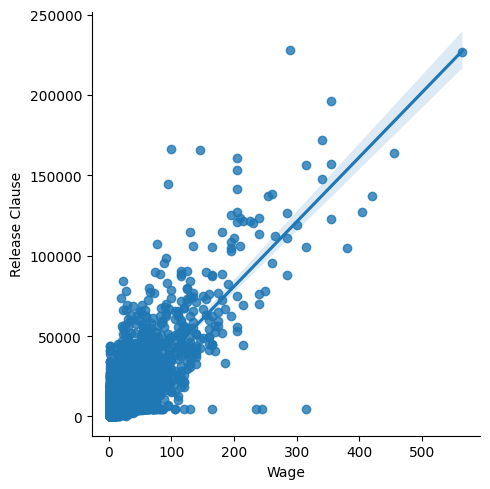

In [ ]:
sns.lmplot(x="Wage",y="Release Clause",data=fifa)#scatter plot with linear regression

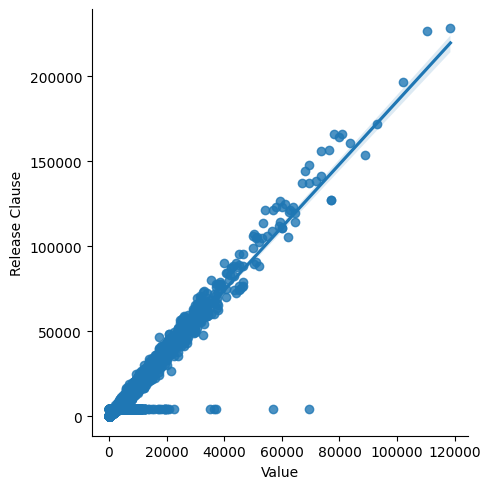

In [ ]:
sns.lmplot(x="Value",y="Release Clause",data=fifa)

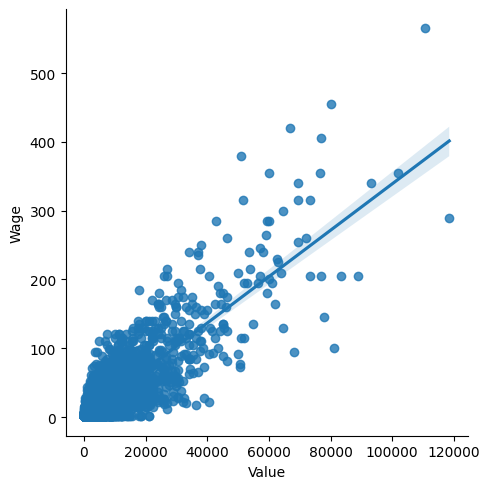

In [ ]:
sns.lmplot(x="Value",y="Wage",data=fifa)

25.0


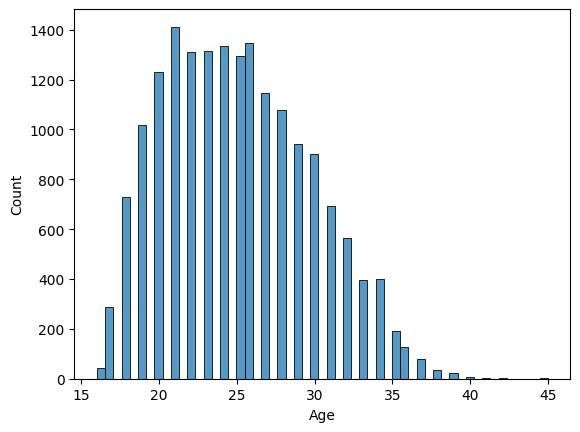

In [ ]:
sns.histplot(x="Age",data=fifa)
print(fifa["Age"].median())

<Axes: xlabel='Preferred Foot', ylabel='count'>

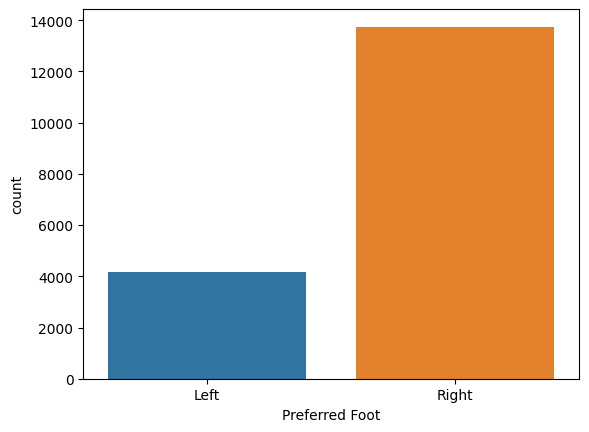

In [ ]:
sns.countplot(x="Preferred Foot",data=fifa)
#conclusion: there are more number of player that preffers right foot

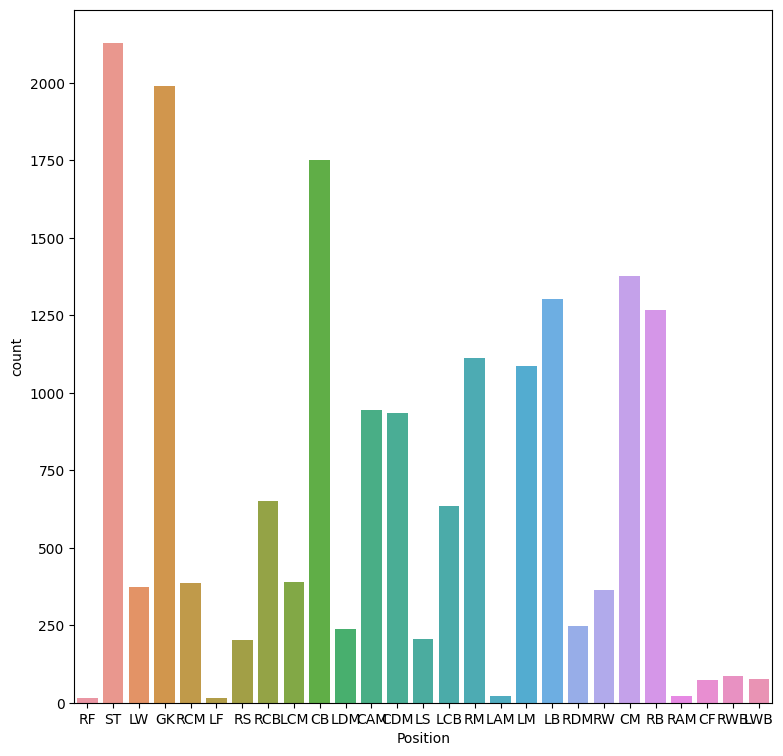

In [ ]:
plt.subplots(figsize=(9,9))
sns.countplot(x="Position",data=fifa)
plt.show()

<Axes: xlabel='International Reputation', ylabel='count'>

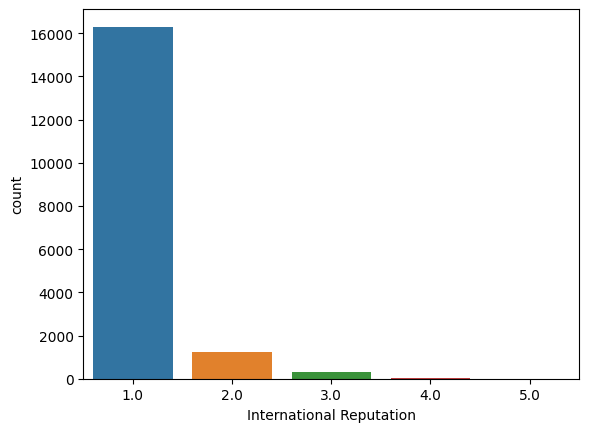

In [ ]:
sns.countplot(x="International Reputation",data=fifa)

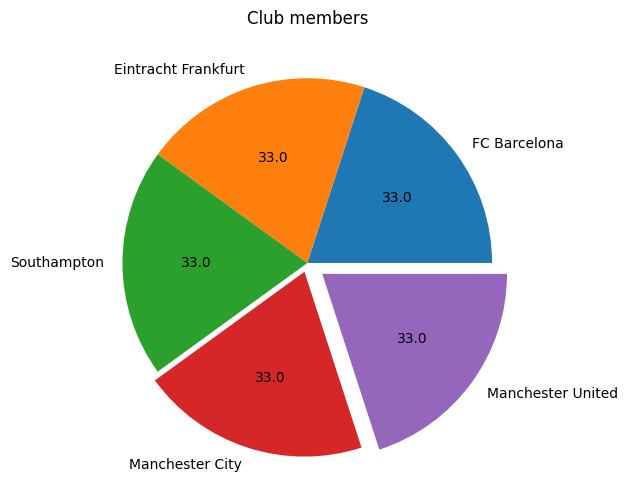

In [ ]:
plt.subplots(figsize=(6,6))
size = fifa["Club"].value_counts().sort_values(ascending = False).head(5)
def value(val):
               x = np.round(val/100.*size.sum())
               return x
plt.pie(size, labels = size.index, autopct = value, explode=[0,0,0,0.05,0.1])
plt.title("Club members")
plt.show()